In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showimg(img, cmap="gray"):
	plt.imshow(img, cmap), plt.xticks([]), plt.yticks([])
	plt.show()

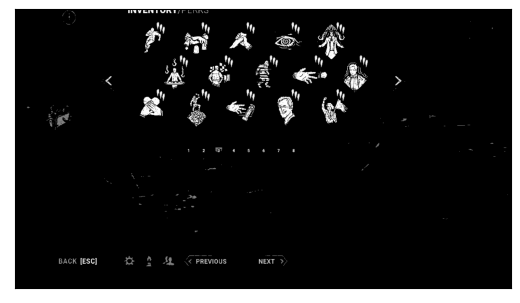

In [3]:
screen = cv2.cvtColor(cv2.imread("screen1.png"), cv2.COLOR_BGR2GRAY)
height, width = screen.shape
screen = screen[height//2:, :width//2]
_,screen = cv2.threshold(screen, 100, 255, cv2.THRESH_TOZERO)
showimg(screen)

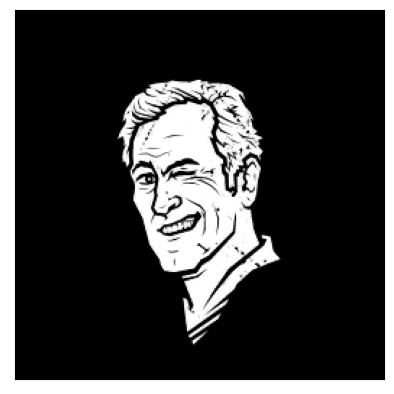

In [4]:
img = cv2.imread("flipFlop.png", cv2.IMREAD_UNCHANGED)
template = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype("float")*img[:,:,3]/255
template = template.astype("uint8")
#_,template = cv2.threshold(template, 100, 255, cv2.THRESH_TOZERO)
showimg(template)

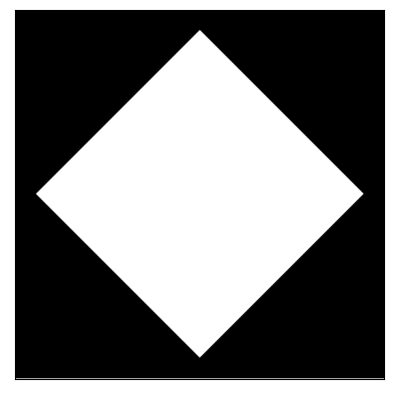

In [5]:
mask = cv2.imread("../data/mask.png", cv2.IMREAD_GRAYSCALE)
showimg(mask)

In [9]:
perkSize = 82 # This value is from the calibrated median
sizes = [ (perkSize + offset) for offset in range(-3,4) ]
templates = [cv2.resize(template, (x,x)) for x in sizes]
masks = [cv2.resize(mask, (x,x)) for x in sizes]

In [10]:
match = [cv2.matchTemplate(screen, t, cv2.TM_SQDIFF_NORMED, mask=m) for (t,m) in zip(templates,masks)]
#for m in match:
#	showimg(m)

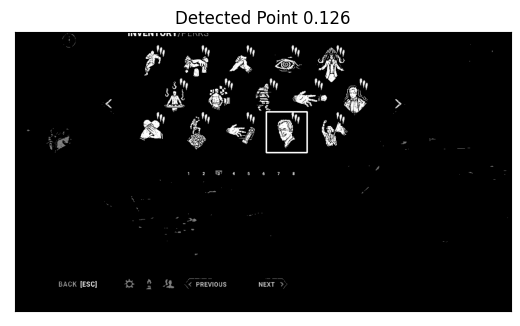

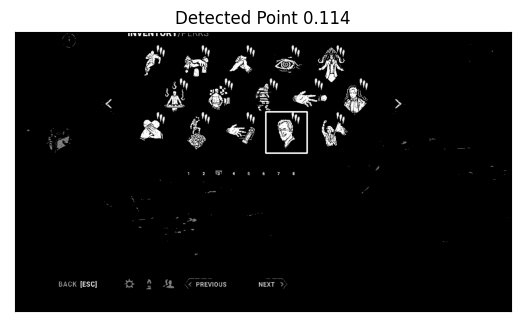

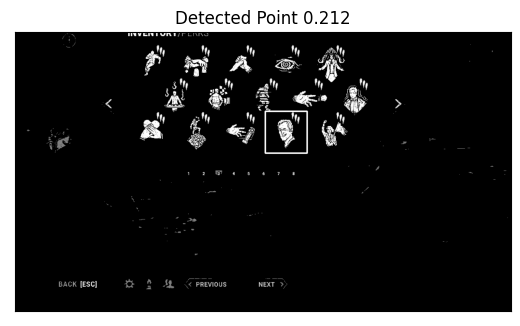

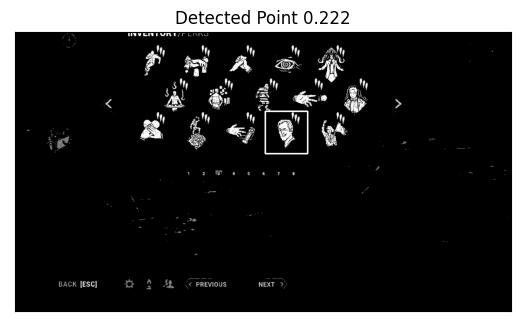

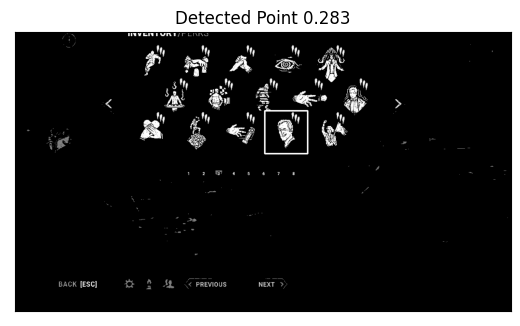

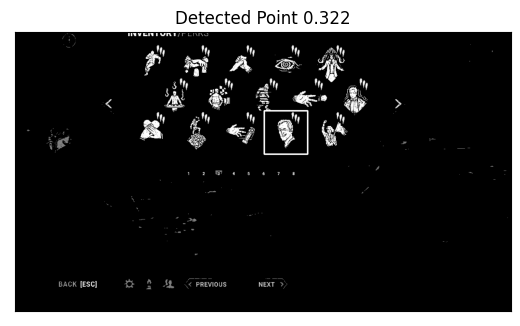

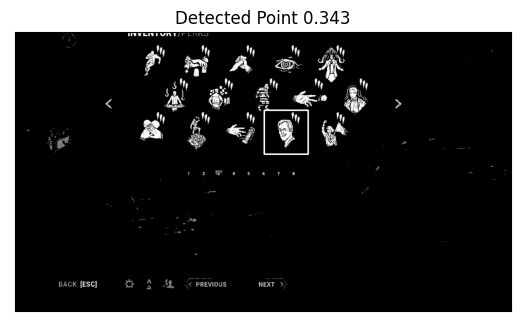

In [11]:
for m,t in zip(match, templates):
	w,h = t.shape
	min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(m)
	#print(sorted(m.flatten())[:10])
	#print(min_val, max_val)
	# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
	top_left = min_loc
	bottom_right = (top_left[0] + w, top_left[1] + h)
	screen2 = screen.copy()
	cv2.rectangle(screen2,top_left, bottom_right, 255, 2)
	plt.imshow(screen2,cmap = 'gray')
	plt.title(f'Detected Point {round(min_val,3)}'), plt.xticks([]), plt.yticks([])
	plt.show()